In [157]:
import pandas as pd
import numpy as np

l=pd.read_csv(r"C:\Users\usre\Downloads\indian_liver_patient - indian_liver_patient.csv")

In [159]:
l.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [161]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
l.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [163]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [165]:
print(l['Gender'].isnull().sum())


0


In [167]:
#changing the gender datatype to display the heatmap
#Clean strings
# Step 1: Force string
l['Gender'] = l['Gender'].astype(str)

# Step 2: Clean spaces and lowercase
l['Gender'] = l['Gender'].str.strip().str.lower()

# Step 3: Map correct small-letter version
l['Gender'] = l['Gender'].map({'male': 1, 'female': 0})

# Step 5: Convert to int
l['Gender'] = l['Gender'].astype(int)

In [169]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int32  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 48.0 KB


In [171]:
l.shape

(583, 11)

In [173]:
l.sample(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
17,33,1,1.6,0.5,165,15,23,7.3,3.5,0.92,2
79,58,0,2.8,1.3,670,48,79,4.7,1.6,0.50,1
92,60,1,8.6,4.0,298,412,850,7.4,3.0,0.60,1


In [175]:
l['Gender'].unique()

array([0, 1])

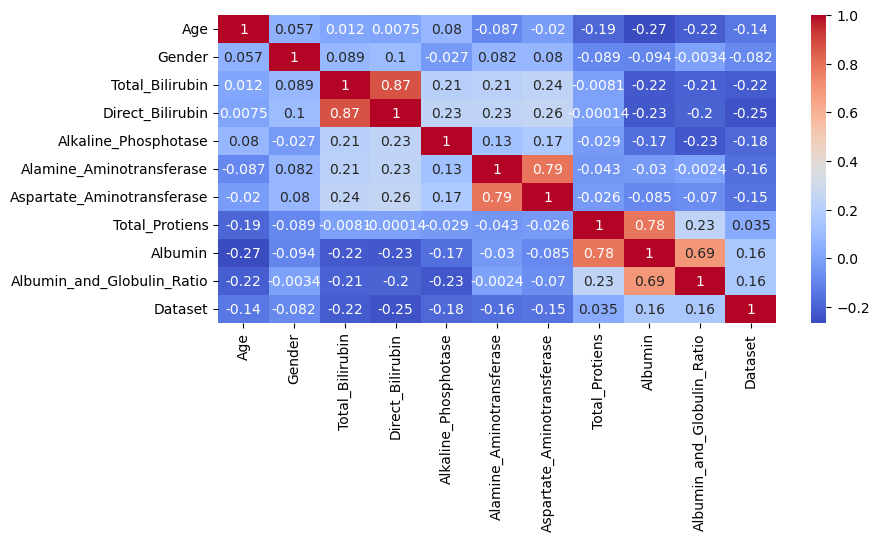

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = l.corr()

# Plot heatmap
plt.figure(figsize=(9, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


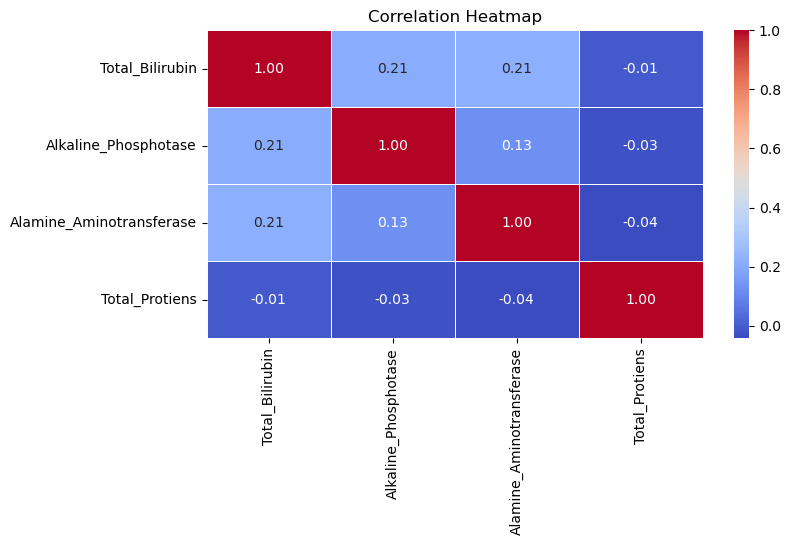

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
# Subset of the columns you provided
f = ['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Total_Protiens']

# Calculate the correlation matrix
corr = l[f].corr()

# Create the heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


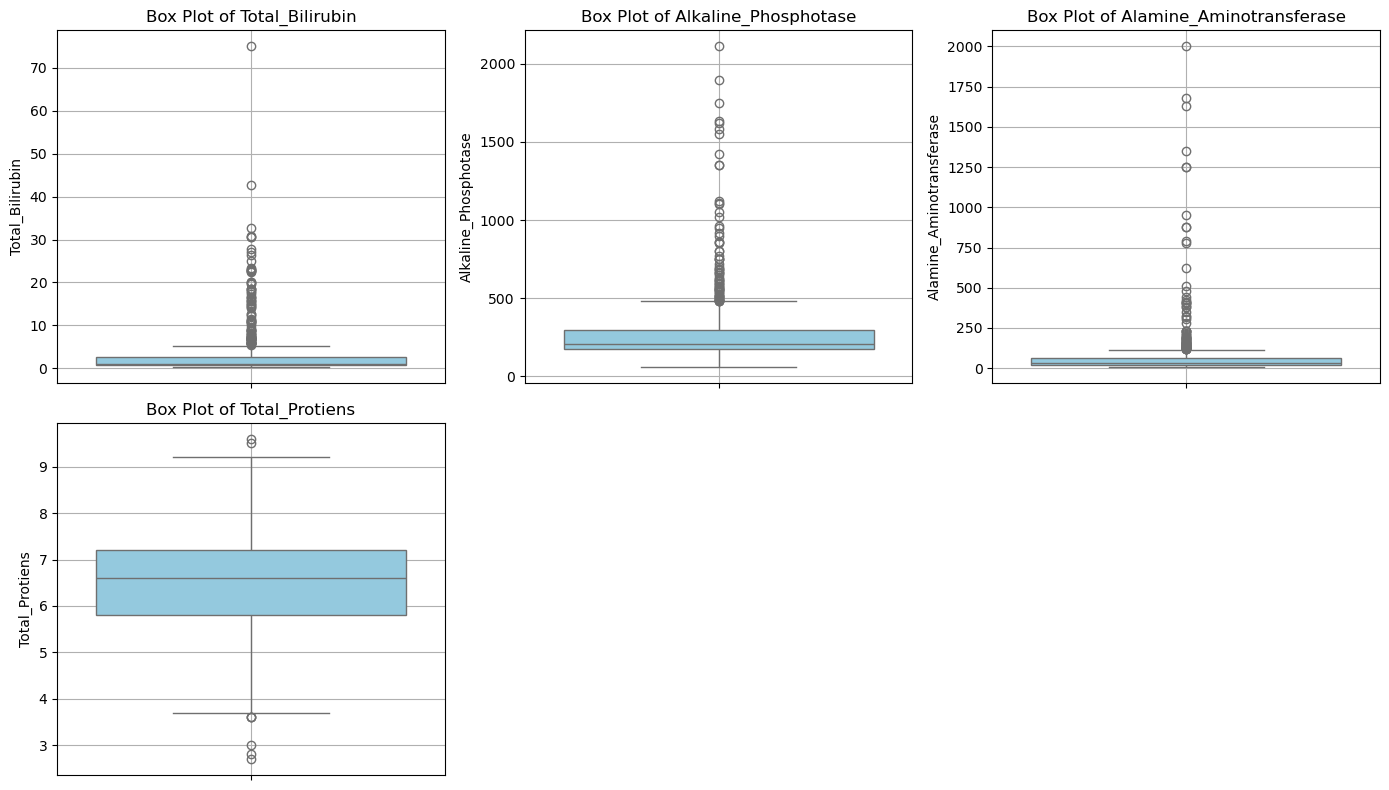

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to analyze
f = ['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Total_Protiens']
# Set plot size and layout
plt.figure(figsize=(14, 8))
for i, col in enumerate(f):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=l[col], color='skyblue')  # Corrected this line
    plt.title(f'Box Plot of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [182]:
def cap_outliers(l, column):
    Q1 = l[column].quantile(0.25)
    Q3 = l[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    l[column] = l[column].clip(lower=lower_bound, upper=upper_bound)
    return l

# Apply to all selected features
for col in ['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Total_Protiens']:
    ld = cap_outliers(l, col)


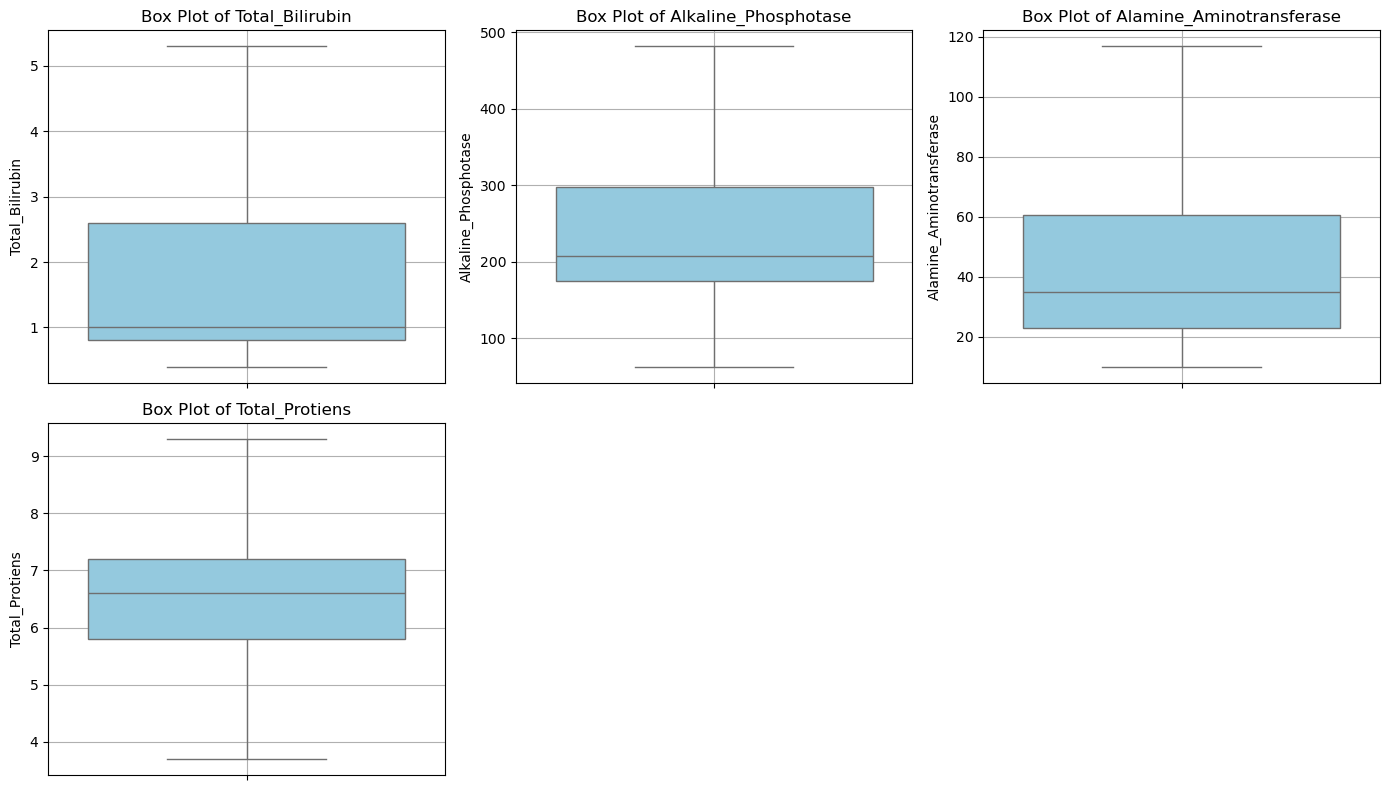

In [97]:
"The outlayer has been capped now checking whether the capped outlayers have treated"
import seaborn as sns
import matplotlib.pyplot as plt

# Features to analyze
f = ['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Total_Protiens']
# Set plot size and layout
plt.figure(figsize=(14, 8))
for i, col in enumerate(f):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=l[col], color='skyblue')  # Corrected this line
    plt.title(f'Box Plot of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()


In [185]:
#Checking data imbalance

l['Dataset'].value_counts()


Dataset
1    416
2    167
Name: count, dtype: int64

In [187]:
'based on heat map slected the below features'

f=[['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Total_Protiens']]
t=['Dataset']

In [189]:
print(l.dtypes)


Age                             int64
Gender                          int32
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [191]:
print(l.applymap(type).nunique())


Age                           1
Gender                        1
Total_Bilirubin               1
Direct_Bilirubin              1
Alkaline_Phosphotase          1
Alamine_Aminotransferase      1
Aspartate_Aminotransferase    1
Total_Protiens                1
Albumin                       1
Albumin_and_Globulin_Ratio    1
Dataset                       1
dtype: int64


C:\Users\usre\AppData\Local\Temp\ipykernel_6488\2180225440.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(l.applymap(type).nunique())


In [193]:
df = l.apply(pd.to_numeric, errors='coerce')
print(df.isnull().sum())  # Check how many NaNs


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [195]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Step 1: Remove leading/trailing spaces and force all columns to strings temporarily
l = l.astype(str).apply(lambda x: x.str.strip())

# Step 2: Replace known bad strings with actual NaN
l.replace(['', 'nan', 'NaN', 'None'], pd.NA, inplace=True)

# Step 3: Convert everything to numeric (non-convertibles become NaN)
l = l.apply(pd.to_numeric, errors='coerce')

# Step 4: Drop rows with NaN (or use fillna if you prefer)
df = l.dropna()

# Step 5: Separate features and label
X = l[['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Total_Protiens']]
y=l['Dataset']
# Step 6: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampling complete!")
print("Class distribution after SMOTE:\n", y_resampled.value_counts())


Resampling complete!
Class distribution after SMOTE:
 Dataset
1    416
2    416
Name: count, dtype: int64


In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
# Step 5: Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7604790419161677
Confusion Matrix:
 [[55 29]
 [11 72]]

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.65      0.73        84
           2       0.71      0.87      0.78        83

    accuracy                           0.76       167
   macro avg       0.77      0.76      0.76       167
weighted avg       0.77      0.76      0.76       167



In [207]:
import pickle

# Assuming you have a trained model (e.g., a RandomForestClassifier)import pickle

# Assume your new trained model is named `rf_model`
with open('random_forest_liver_model.pkl', 'wb') as f:
    pickle.dump(clf, f)
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [211]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\usre
